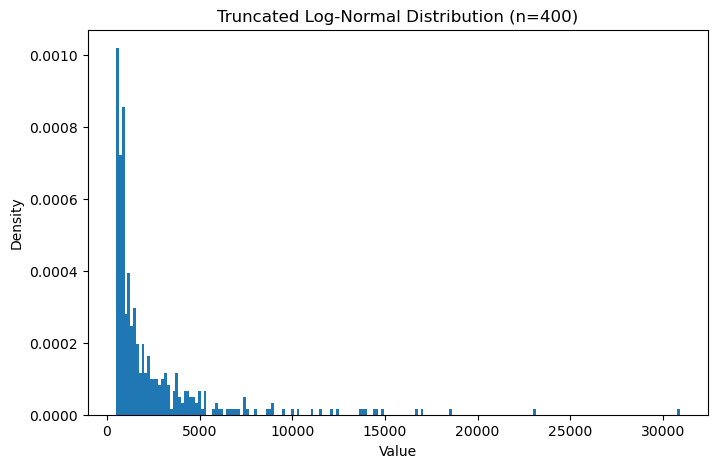

100.70919951328146 6182.093010460243
503.5459975664073 30910.465052301217


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sample_trunc_lognormal(mean_lin, sigma_lin, min_lin, size=1):
    """
    Draw 'size' samples from a LogNormal(mean_lin, sigma_lin) truncated below at min_lin.
    """
    # Compute underlying normal parameters mu, sigma_n
    #var_lin = sigma_lin**2
    #sigma_n = np.sqrt(np.log(1 + var_lin / mean_lin**2))
    #mu = np.log(mean_lin) - 0.5 * sigma_n**2
    mu = mean_lin
    sigma_n = sigma_lin

    # Rejection-sampling loop
    samples = np.random.lognormal(mean=mu, sigma=sigma_n, size=size)
    mask = samples < min_lin
    while np.any(mask):
        samples[mask] = np.random.lognormal(mean=mu, sigma=sigma_n, size=mask.sum())
        mask = samples < min_lin
    return samples

# Generate and plot for n samples
mean_lin = 4.6
sigma_lin = 1.6
min_lin = 100
n = 400

samples = sample_trunc_lognormal(mean_lin, sigma_lin, min_lin, size=n)

plt.figure(figsize=(8, 5))
plt.hist(samples*5, bins=200, density=True)
plt.title(f"Truncated Log-Normal Distribution (n={n})")
plt.xlabel("Value")
plt.ylabel("Density")
#plt.xlim(min_lin, np.percentile(samples, 99.9))
plt.show()
tmp = 5*samples
print(samples.min(),samples.max())
print(tmp.min(),tmp.max())
